In [88]:
import pandas as pd
import numpy as np

In [89]:
columnNames = ['userId', 'item_id', 'Ratings', 'Timestamp']
movieData = pd.read_csv(filepath_or_buffer='u.data', sep='\t', names=columnNames)

In [90]:
movieData.head()

,userId,item_id,Ratings,Timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [91]:
movieTitles = pd.read_csv('Movie_Id_Titles')
movieTitles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [92]:
movieData = pd.merge(left= movieData, right=movieTitles, on='item_id')

In [93]:
movieData.head()

,userId,item_id,Ratings,Timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


EDA

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [95]:
movieData.groupby('title')['Ratings'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: Ratings, dtype: float64

In [96]:
movieData.groupby('title')['Ratings'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: Ratings, dtype: int64

In [97]:
ratings = pd.DataFrame(data=movieData.groupby('title')['Ratings'].mean())
ratings.head()

,Ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [98]:
ratings['number of ratings'] = movieData.groupby('title')['Ratings'].count()

In [99]:
ratings.head()

,Ratings,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Visualizations

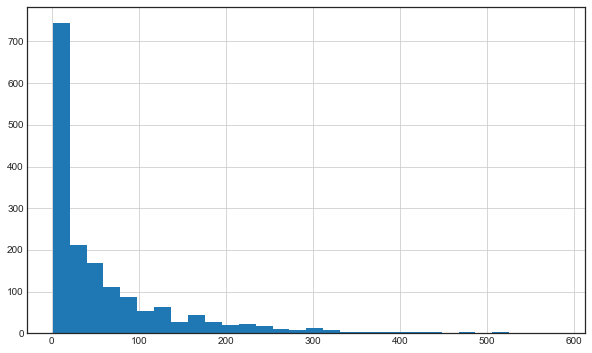

In [100]:
plt.figure(figsize=(10,6))
ratings['number of ratings'].hist(bins=30)

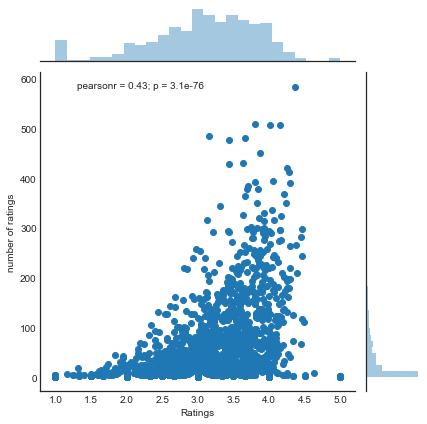

In [101]:
sns.jointplot(y = 'number of ratings', x = 'Ratings', data=ratings)

Recomendation of movies

In [102]:
movieData.columns

Index(['userId', 'item_id', 'Ratings', 'Timestamp', 'title'], dtype='object')

In [103]:
movieMatirx = movieData.pivot_table(index='userId', columns='title', values='Ratings')
movieMatirx.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
ratings.sort_values('number of ratings', ascending=False).head()

,Ratings,number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [105]:
starwars_ratings = movieMatirx['Star Wars (1977)']
liarLiar_ratings = movieMatirx['Liar Liar (1997)']
starwars_ratings.head()

userId
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [106]:
similarToStarWars = movieMatirx.corrwith(starwars_ratings)
similartoLiarLiar = movieMatirx.corrwith(liarLiar_ratings)
similarToStarWars.head()

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [107]:
corrStarwars = pd.DataFrame(similarToStarWars, columns=['Correlation'])

In [108]:
corrStarwars.dropna(inplace=True)
corrStarwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [109]:
corrStarwars.sort_values(by='Correlation', ascending=False).head()

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0


In [110]:
corrStarwars = corrStarwars.join(ratings['number of ratings'])
corrStarwars.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [115]:
corrStarwars[corrStarwars['number of ratings']>100].sort_values(by='Correlation', ascending = False).head()

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [116]:
corrLiarLiar = pd.DataFrame(similartoLiarLiar, columns=['Correlation'])

In [117]:
corrLiarLiar.dropna(inplace=True)

In [119]:
corrLiarLiar = corrLiarLiar.join(ratings['number of ratings'])

In [120]:
corrLiarLiar.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [121]:
corrLiarLiar[corrLiarLiar['number of ratings']>100].sort_values(by='Correlation', ascending = False).head()

,Correlation,number of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
